# K-Means Clustering

Vamos a crear algunos datos falsos que incluyan personas agrupadas por ingresos y edad, de forma aleatoria.

In [23]:
from numpy import random, array

#Crear grupos/clusters falsos de ingresos/edad para N personas en k grupos/clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = [] #Almacena los datos generados (los pares de [ingreso, edad]).
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            #Genera un valor de ingreso siguiendo una distribución normal (o Gaussiana). 
            #La mayoría de los valores estarán cerca del incomeCentroid calculado previamente, 
            # con una desviación estándar de $10,000 
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

Usaremos k-means para redescubrir estos grupos (clusters) en el aprendizaje no supervisado.

[0 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2
 2 0 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


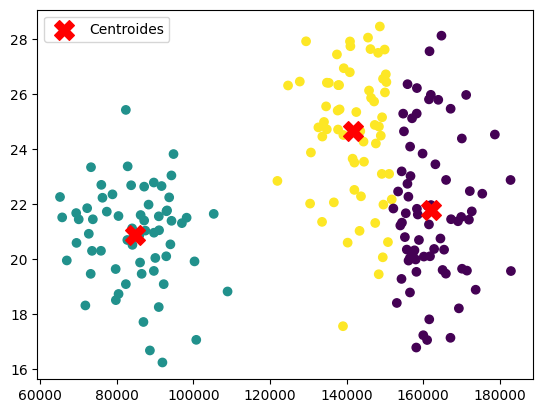

In [26]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

data = createClusteredData(200, 3)

model = KMeans(n_clusters=3)

# Estandariza los datos
model = model.fit(data)

# Podemos ver los grupos (clusters) a los que se asignó cada punto de datos
print(model.labels_)

centros = model.cluster_centers_


# data[:,0]: Representa la columna de ingresos (el primer elemento de cada par [ingreso, edad]). 
# Estos serán los valores del eje X.
# data[:,1]: Representa la columna de edades (el segundo elemento). Estos serán los valores del eje Y.
# Le dice a la función scatter que use los labels (model.labels_) como el criterio para el color. 
# Cada punto se colorea según el cluster al que fue asignado (0, 1, 2, 3, o 4), 
# permitiendo ver la separación gráfica de los cinco grupos.
plt.scatter(x=data[:,0], y=data[:,1], c=model.labels_.astype(float))
plt.scatter(centros[:, 0], centros[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.legend()
plt.show()